## Description

1. age
2. sex
3. cp: chest pain type (4 values)
4. tresbp: resting blood pressure
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl
7. restcg: resting electrocardiographic results (values 0,1,2)
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0 & 1

### Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r"C:\Users\raji9\OneDrive\Desktop\Notebooks\AML-lab\AML-2\heartDisease.xlsx")

In [3]:
df_copy = df.copy()

### Basic Analysis

In [4]:
df_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df_columns = df_copy.columns
df_columns[:-1]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [6]:
df_copy.shape

(303, 14)

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df_copy.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df_copy.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

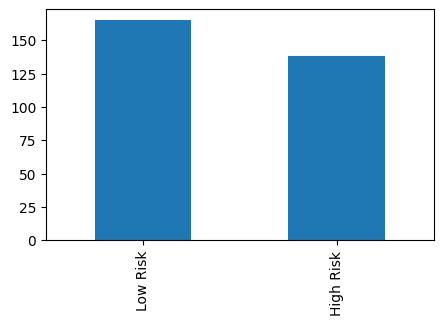

In [10]:
plt.figure(figsize=(5,3))
df_copy["target"].value_counts().plot(kind = "bar");
plt.xticks([0,1],['Low Risk','High Risk']);

In [11]:
print(pd.crosstab(index=df["sex"], columns=df["target"],normalize=True,margins=True))

target         0         1       All
sex                                 
0       0.079208  0.237624  0.316832
1       0.376238  0.306931  0.683168
All     0.455446  0.544554  1.000000


<AxesSubplot: xlabel='age', ylabel='Density'>

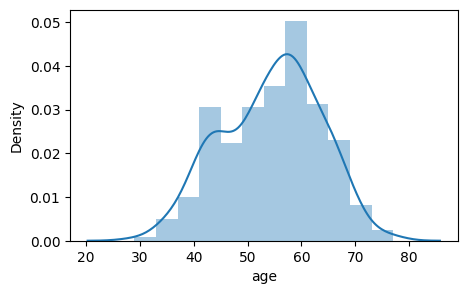

In [12]:
plt.figure(figsize=(5,3));
sns.distplot(df["age"])

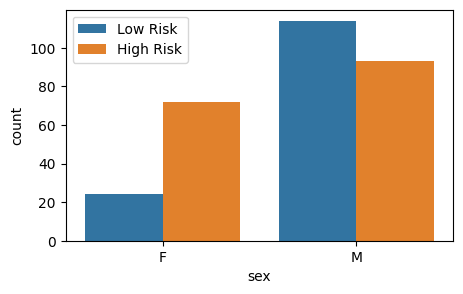

In [13]:
plt.figure(figsize=(5,3));
sns.countplot(data = df_copy, x = "sex", hue = "target")
plt.xticks([0,1],['F','M']);
plt.legend(labels = ["Low Risk","High Risk"]);

* More than 60 females in the dataset having risk of heart disease and around 80 males having risk of heart disease
* Anyhow the dataset consist of 68% of male and 31% of Female

In [14]:
print(pd.crosstab(index=df["cp"], columns=df["target"],normalize=True,margins=True))

target         0         1       All
cp                                  
0       0.343234  0.128713  0.471947
1       0.029703  0.135314  0.165017
2       0.059406  0.227723  0.287129
3       0.023102  0.052805  0.075908
All     0.455446  0.544554  1.000000


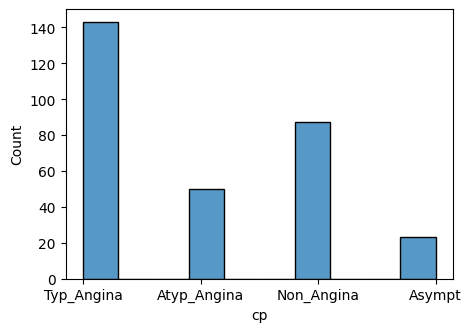

In [15]:
plt.figure(figsize=(5,3.5));
sns.histplot(df["cp"])
plt.xticks([0,1,2,3],["Typ_Angina","Atyp_Angina","Non_Angina", "Asympt"]);

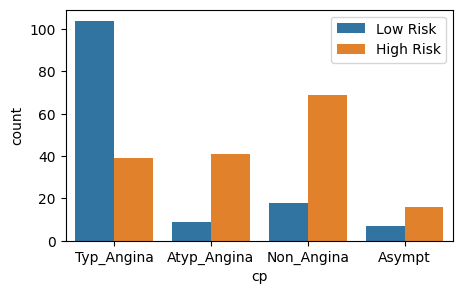

In [16]:
plt.figure(figsize=(5,3));
sns.countplot(data = df_copy, x = "cp", hue = "target")
plt.xticks([0,1,2,3],["Typ_Angina","Atyp_Angina","Non_Angina", "Asympt"]);
plt.legend(labels = ["Low Risk","High Risk"]);

* out of **47%** people who experience typical angina only **12%** people having high chances of heart disease.
* out of **16%** people who experience Atypical angina, around **13%** having high chances of heart disease.
* out of **28%** people who experience Non angina, in that **22%** people having high risk of heart disease.
* remaining **7%** peole who experience Asymtomatic pain, in that **5%** people having high risk of heart disease

In [17]:
print(pd.crosstab(index=df["fbs"], columns=df["target"],normalize=True,margins=True))

target         0         1       All
fbs                                 
0       0.382838  0.468647  0.851485
1       0.072607  0.075908  0.148515
All     0.455446  0.544554  1.000000


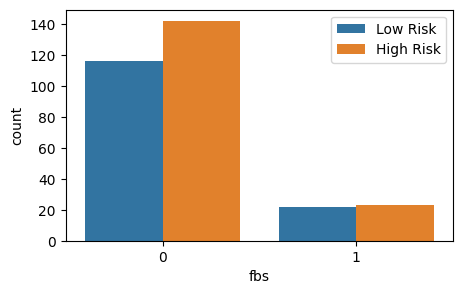

In [18]:
plt.figure(figsize=(5,3));
sns.countplot(data = df_copy, x = "fbs", hue = "target")
plt.legend(labels = ["Low Risk","High Risk"]);

* There are possibilty whose fbs<120mg/dl can have less chances of getting heart disease
* only **14%** people are diabetic

In [76]:
print(pd.crosstab(index=df["slope"], columns=df["target"],normalize=True,margins=True))

target         0         1       All
slope                               
0       0.039604  0.029703  0.069307
1       0.300330  0.161716  0.462046
2       0.115512  0.353135  0.468647
All     0.455446  0.544554  1.000000


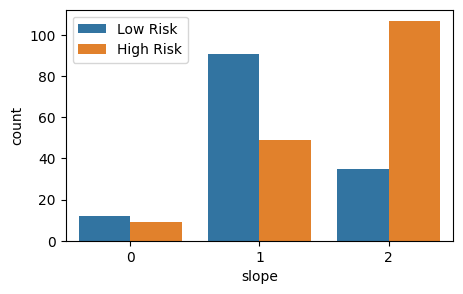

In [78]:
plt.figure(figsize=(5,3));
sns.countplot(data = df, x = "slope", hue = "target")
plt.legend(labels = ["Low Risk","High Risk"]);

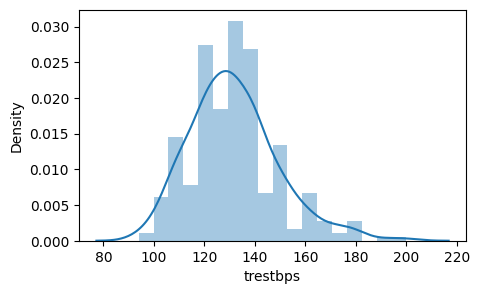

In [19]:
plt.figure(figsize=(5,3));
sns.distplot(df_copy["trestbps"]);

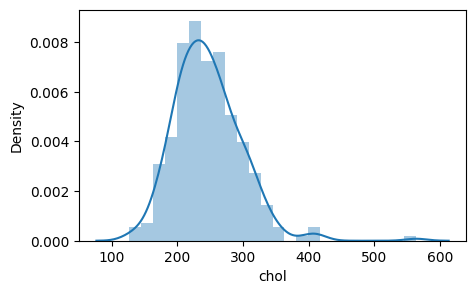

In [20]:
plt.figure(figsize=(5,3));
sns.distplot(df_copy["chol"]);

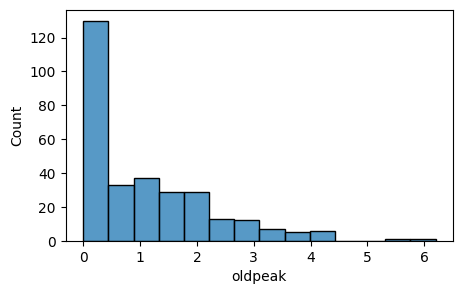

In [81]:
plt.figure(figsize=(5,3));
sns.histplot(df["oldpeak"]);

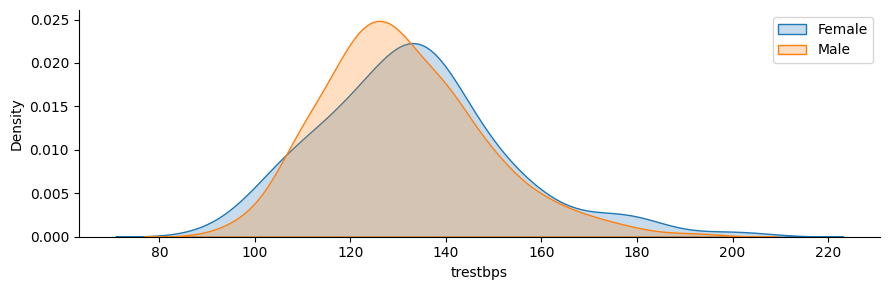

In [85]:
y = sns.FacetGrid(data=df,hue = "sex",aspect = 3)
y.map(sns.kdeplot,"trestbps",shade=True);
# plt.xticks([0,1],["Female","Male"] )
plt.legend(labels = ["Female","Male"] );

* For Women the resting blood pressure is overall lesser than men

### Correlation

In [21]:
corr = df.corr()

<AxesSubplot: >

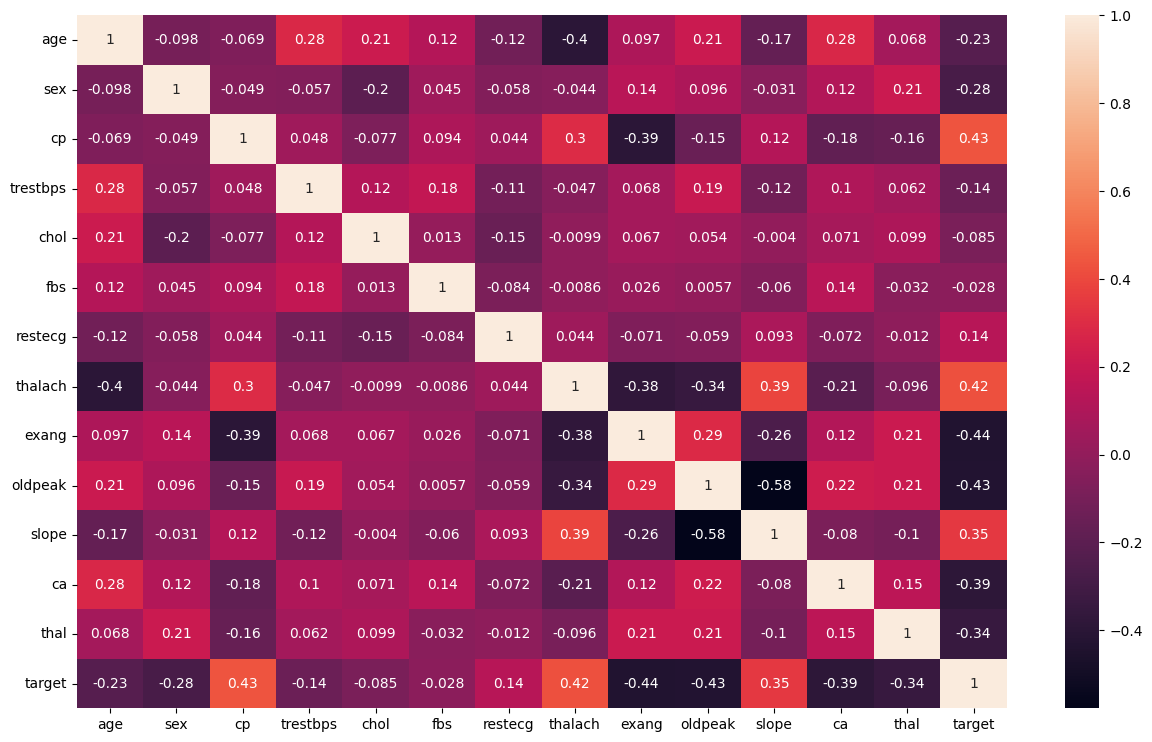

In [22]:
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot = True)

* cp, thalach and slope are positively correlated with target(directly proportional)
* exang, oldpeak and ca are inversely proportional to target

### Outlier Anaysis & Removal

In [23]:
Counti_Col = ["age", "trestbps", "chol", "thalach","oldpeak"]

In [24]:
Catego_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [25]:
Catego_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [26]:
for i in Catego_col:
    print(i,df_copy[i].unique())

sex [1 0]
cp [3 2 1 0]
fbs [1 0]
restecg [0 1 2]
exang [0 1]
slope [0 2 1]
ca [0 2 1 3 4]
thal [1 2 3 0]


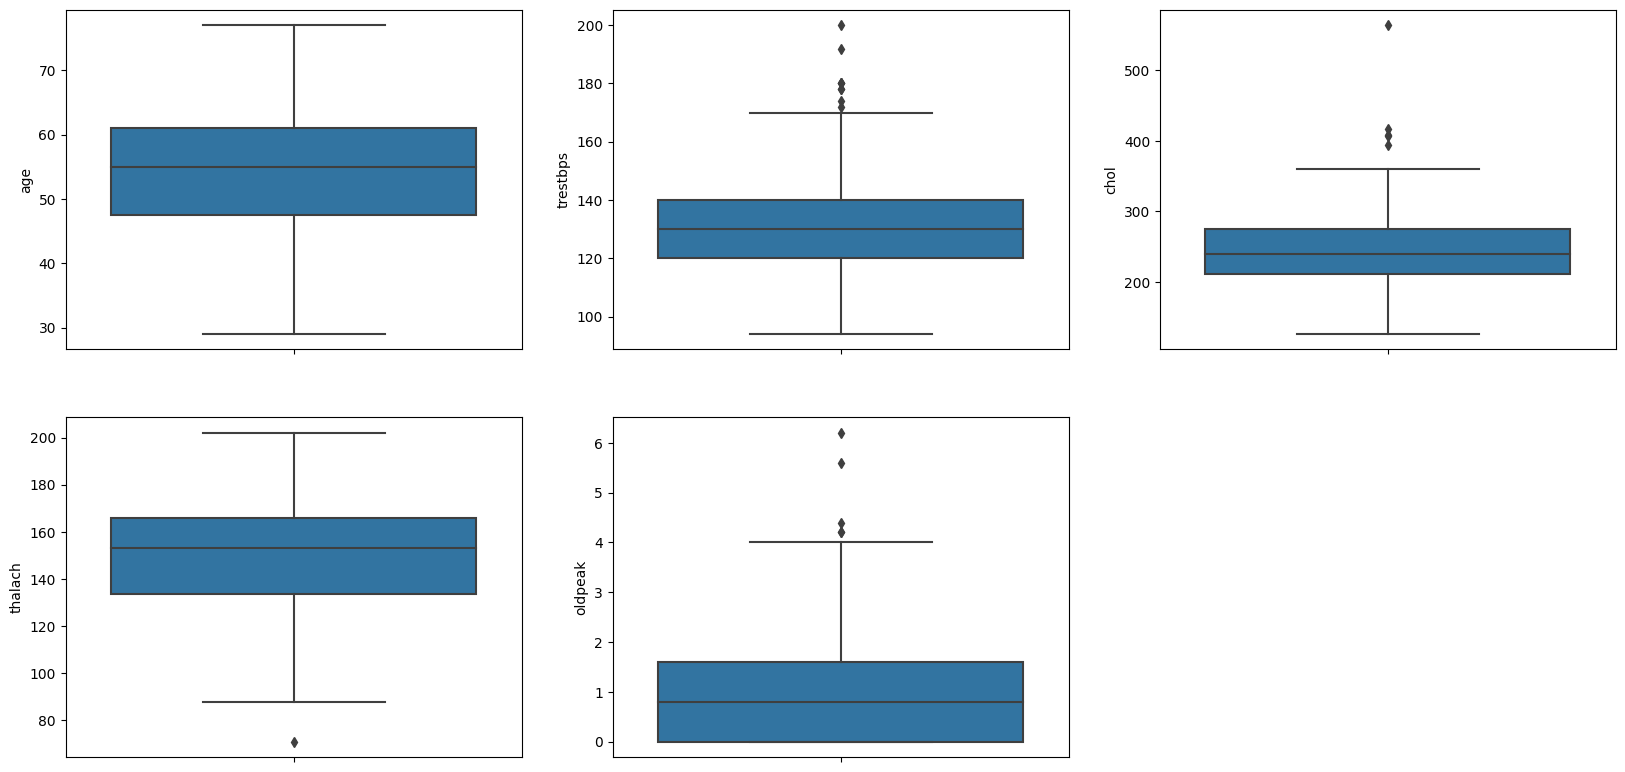

In [27]:
plt.figure(figsize=(20,15))
for j,i in enumerate(Counti_Col):
    plt.subplot(3,3,j+1)
    sns.boxplot(y = df_copy[i], data = df)

In [28]:
k = df_copy.trestbps.quantile([0.25,0.50,0.75])

In [29]:
k

0.25    120.0
0.50    130.0
0.75    140.0
Name: trestbps, dtype: float64

In [30]:
IQR = k[0.75] - k[0.25]
lower = k[0.25] - (1.5*IQR)
upper = k[0.75] + (1.5*IQR)

In [31]:
print("Total no of Outliers in trestbps", df[(df["trestbps"]<lower) | (df["trestbps"]>upper)].shape[0])
df_copy = df[(df["trestbps"]>lower) & (df["trestbps"]<upper)]

Total no of Outliers in trestbps 9


In [32]:
df_copy.shape[0]

290

### Encoding

**One-Hot Encoding**

In [ ]:
df_copy = pd.get_dummies(df_copy, columns = Catego_col)

In [34]:
df_copy.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [36]:
X = df_copy.drop("target",axis=1)

In [37]:
X.shape

(290, 30)

In [38]:
Y = df_copy.target

### Feature scaling

In [39]:
from sklearn.preprocessing import StandardScaler
Scaling = StandardScaler()

In [40]:
# X = Scaling.fit_transform(X)

### Splitting of Data

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X,Y)

### Modelling

**1.Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 150)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=150)

In [44]:
LR_pred = LR.predict(x_test)

In [45]:
from sklearn.metrics import classification_report, accuracy_score

In [46]:
LR_acc = accuracy_score(y_test,LR_pred)

In [47]:
print("Accuracy score of Logistic regression: {:.2f}%".format(LR_acc*100),end="\n\n")
print(classification_report(y_test, LR_pred))

Accuracy score of Logistic regression: 87.67%

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.93      0.86      0.89        43

    accuracy                           0.88        73
   macro avg       0.87      0.88      0.87        73
weighted avg       0.88      0.88      0.88        73



**2.Decision Tree**

In [48]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion="gini",max_depth=150)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=150)

In [49]:
DTC_pred = DTC.predict(x_test)

In [50]:
DTC_acc = accuracy_score(y_test,DTC_pred)

In [51]:
print("Accuracy score of DecisionTreeClassifier: {:.2f}%".format(DTC_acc*100),end="\n\n")
print(classification_report(y_test, DTC_pred))

Accuracy score of DecisionTreeClassifier: 76.71%

              precision    recall  f1-score   support

           0       0.70      0.77      0.73        30
           1       0.82      0.77      0.80        43

    accuracy                           0.77        73
   macro avg       0.76      0.77      0.76        73
weighted avg       0.77      0.77      0.77        73



**3.SupportVectorMachine**

In [52]:
from sklearn.svm import SVC
SVM = SVC(kernel = "linear",probability=True)
SVM.fit(x_train,y_train)

SVC(kernel='linear', probability=True)

In [53]:
SVM_pred = SVM.predict(x_test)

In [54]:
SVM_acc = accuracy_score(y_test,SVM_pred)

In [55]:
print("Accuracy score of SupportVectorMachine: {:.2f}%".format(SVM_acc*100),end="\n\n")
print(classification_report(y_test, SVM_pred))

Accuracy score of SupportVectorMachine: 80.82%

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.82      0.86      0.84        43

    accuracy                           0.81        73
   macro avg       0.80      0.80      0.80        73
weighted avg       0.81      0.81      0.81        73



**4.RandomForest**

In [56]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=150,random_state=42)
RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [57]:
RFC_pred = RFC.predict(x_test)

In [58]:
RFC_acc = accuracy_score(y_test,RFC_pred)

In [59]:
print("Accuracy score of RandomForestClassifier: {:.2f}%".format(RFC_acc*100),end="\n\n")
print(classification_report(y_test, RFC_pred))

Accuracy score of RandomForestClassifier: 83.56%

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        30
           1       0.92      0.79      0.85        43

    accuracy                           0.84        73
   macro avg       0.83      0.85      0.83        73
weighted avg       0.85      0.84      0.84        73



**5.Adaboost**

In [60]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(n_estimators=4,learning_rate=1.0)
ABC.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=4)

In [61]:
ABC_pred = ABC.predict(x_test)

In [62]:
ABC_acc = accuracy_score(y_test,ABC_pred)

In [63]:
print("Accuracy score of AdaboostClassifier: {:.2f}%".format(ABC_acc*100),end="\n\n")
print(classification_report(y_test, ABC_pred))

Accuracy score of AdaboostClassifier: 86.30%

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.92      0.84      0.88        43

    accuracy                           0.86        73
   macro avg       0.86      0.87      0.86        73
weighted avg       0.87      0.86      0.86        73



**6.Adaboost using Logistic as base estimator**

In [64]:
ABC_logistic = AdaBoostClassifier(n_estimators=4,base_estimator=LR,learning_rate=1.0)
ABC_logistic.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=150),
                   n_estimators=4)

In [65]:
ABC_logistic_pred = ABC_logistic.predict(x_test)

In [66]:
ABC_logistic_acc = accuracy_score(y_test,ABC_logistic_pred)

In [67]:
print("Accuracy score of AdaboostClassifier with logistic: {:.2f}%".format(ABC_logistic_acc*100),end="\n\n")
print(classification_report(y_test, ABC_logistic_pred))

Accuracy score of AdaboostClassifier with logistic: 76.71%

              precision    recall  f1-score   support

           0       0.70      0.77      0.73        30
           1       0.82      0.77      0.80        43

    accuracy                           0.77        73
   macro avg       0.76      0.77      0.76        73
weighted avg       0.77      0.77      0.77        73



**7.Adaboost using Svm as base estimator**

In [72]:
ABC_svm = AdaBoostClassifier(n_estimators=50,base_estimator=SVM,learning_rate=1.0)
ABC_svm.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True))

In [73]:
ABC_svm_pred = ABC_svm.predict(x_test)

In [74]:
ABC_svm_acc = accuracy_score(y_test,ABC_svm_pred)

In [75]:
print("Accuracy score of AdaboostClassifier with svm: {:.2f}%".format(ABC_svm_acc*100),end="\n\n")
print(classification_report(y_test, ABC_svm_pred))

Accuracy score of AdaboostClassifier with svm: 73.97%

              precision    recall  f1-score   support

           0       0.92      0.40      0.56        30
           1       0.70      0.98      0.82        43

    accuracy                           0.74        73
   macro avg       0.81      0.69      0.69        73
weighted avg       0.79      0.74      0.71        73



**So, Compared to other model Logistic and Ada boost gives a better result**